# Feature engineering

In [2]:
import pandas as pd

## Introducción

## Transformación de los datos

<h2 style="color:red">Transformación con map</h2>
<p>Mapea un nuevo dato en un dataframe existente.</p>

In [3]:
data = pd.DataFrame({'vegetales': ['lechuga', 'tomate', 'morrón rojo',
                                   'morrón verde', 'brócoli', 'acelga',
                                   'zapallo', 'papa', 'espinaca'],
                     'precio_kg': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,vegetales,precio_kg
0,lechuga,4.0
1,tomate,3.0
2,morrón rojo,12.0
3,morrón verde,6.0
4,brócoli,7.5
5,acelga,8.0
6,zapallo,3.0
7,papa,5.0
8,espinaca,6.0


In [4]:
vegetal_a_color = {
      'lechuga': 'verde',
      'tomate': 'rojo',
      'morrón rojo': 'rojo',
      'morrón verde': 'verde',
      'brócoli': 'verde',
      'zapallo': 'naranja'
}

In [5]:
data['color'] = data['vegetales'].map(vegetal_a_color)
data

,vegetales,precio_kg,color
0,lechuga,4.0,verde
1,tomate,3.0,rojo
2,morrón rojo,12.0,rojo
3,morrón verde,6.0,verde
4,brócoli,7.5,verde
5,acelga,8.0,NaN
6,zapallo,3.0,naranja
7,papa,5.0,NaN
8,espinaca,6.0,NaN


<h2 style="color:red"> Discretización y binning</h2>
<p>Discretiza datos continuos. El binning consiste en llevarlo a bins (pequeños fragmentos).</p>
<p>Relaciona un dato continuo con un rango y se puede mantener el código de referencia a ese código.</p>

In [12]:
edades = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [13]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(edades, bins)

In [14]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [15]:
edades

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [16]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

<h2 style="color:red"> Variables dummies</h2>

In [10]:
df = pd.DataFrame({'animales': ['jirafa', 'jirafa', 'koala',
                                'oso', 'koala', 'jirafa'], 
                   'unDato': range(6)})

In [11]:
df

,animales,unDato
0,jirafa,0
1,jirafa,1
2,koala,2
3,oso,3
4,koala,4
5,jirafa,5


In [12]:
pd.get_dummies(df)

,unDato,animales_jirafa,animales_koala,animales_oso
0,0,1,0,0
1,1,1,0,0
2,2,0,1,0
3,3,0,0,1
4,4,0,1,0
5,5,1,0,0


<h2 style="color:red"> Label Encoder (scikit learn) </h2>
<p>Sirve para normalizar columnas.</p>

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [20]:
le.transform(["tokyo", "tokyo", "amsterdam"]) 

array([2, 2, 0], dtype=int64)

In [21]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [22]:
le.inverse_transform([0,1,2])

C:\Users\Dicsys\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['amsterdam', 'paris', 'tokyo'], dtype='<U9')

In [23]:
integer_encoded = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

In [24]:
integer_encoded

array([1, 1, 2, 0], dtype=int64)

<h2 style="color:red">OneHotEncoder </h2>
<p>Lleva una columna categórica a una matriz binarizada</p>

In [25]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


[[1]
 [1]
 [2]
 [0]]


In [26]:
onehot_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

<h2 style="color:red">Imputer </h2>
<p>Completa valores nulos mediante diferentes estrategias.</p>

In [29]:
from sklearn.preprocessing import Imputer

In [30]:
from numpy import nan
import numpy as np
X = np.array([[ nan, 0, 98 ],
              [3, 7, 99 ], 
              [3, 5, 210 ], 
              [4, nan,202 ], 
              [8, 8, 101 ]])
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [31]:
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)

In [32]:
X2

array([[  4.5,   0. ,  98. ],
       [  3. ,   7. ,  99. ],
       [  3. ,   5. , 210. ],
       [  4. ,   5. , 202. ],
       [  8. ,   8. , 101. ]])

<h2 style="color:red"> Pipelines </h2>
<p>Nos permite el pre-procesamiento. Ejecutamos tareas en cadena.</p>

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(Imputer(strategy='mean'),
                     StandardScaler())

In [34]:
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [35]:
pipe.fit(X)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [36]:
pipe.fit_transform(X)

array([[ 0.        , -1.81369063, -0.84088374],
       [-0.81348922,  0.72547625, -0.82177275],
       [-0.81348922,  0.        ,  1.2995476 ],
       [-0.27116307,  0.        ,  1.14665965],
       [ 1.89814151,  1.08821438, -0.78355076]])

<h2 style="color:red"> Detección de outliers </h2>

<h3 style="color:blue"> Filtrando y transformando outliers </h3>

In [37]:
import seaborn as sns

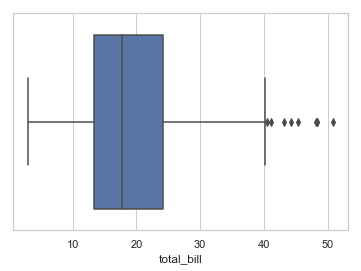

In [38]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [39]:
q75, q25 = np.percentile(tips.total_bill, [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

In [40]:
tips.total_bill[tips.total_bill > max]

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

In [41]:
tips.total_bill[tips.total_bill < min]

Series([], Name: total_bill, dtype: float64)

<h2 style="color:red">Z-Score</h2>
<p>Se conoce como z-scores a aquellos valores expresados según su desvío estándar de la media</p>
<p>z = (valor - promedio) / desvío</p>
<p>Existen tablas de probabilidad que nos dan una noción de que significa el resultado obtenido. Estas las podemos encontrar buscando tablas z-score. </p>
<p>En ella podemos buscar el valor que nos dió el z-score (en las filas de la tabla) y los decimales (las columnas).</p>
<p>Por ejemplo supongamos que nos dio 3. Sin decimales. Por lo que tenemos que buscar el valor 3 y 0.00. El valor que encontramos en esta celda es 0.9987. Esto significa que la probabilidad de que alguien tenga menos años que nuestra alumna es del 99.87%.</p>

<h3 style="color:blue">Filtrando outliers por z-score</h3>
<p>Ahora que sabemos cómo funciona el z-score, podemos utilizarlo para filtrar outliers en nuestros datos. Para eso basta con determinar un umbral a partir del cual borraremos instancias. En el ejemplo de la alumna de 35 años, podemos decir que es una outlier ya que la probabilidad de que alguien tenga más edad que ella es del 0.13%.</p>
<p>Entonces podemos setear el umbral de z-score en 2. De esta forma borraremos de nuestro dataset a todos los alumnos que tengan 30 años o más.</p>